# How to regularize a linear model?
In linear regression, we compute the best coefficients by minimizing a loss function (most commonly the sum of squared errors). We can add a penalty term (sum of coefficients) to this loss function as a constraint to suppress the coefficients computed.

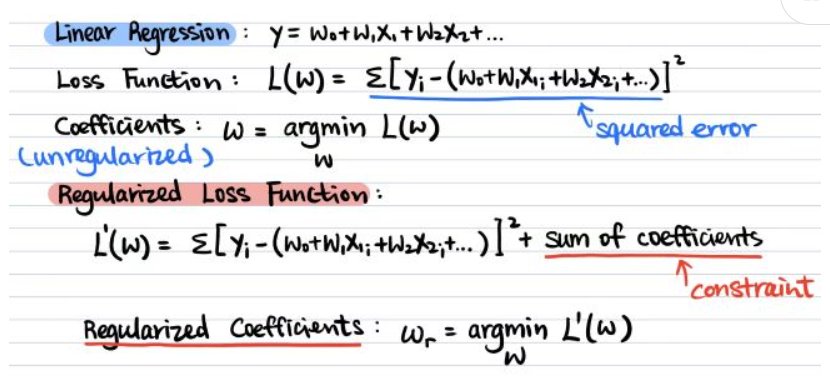

#### Since the coefficients of a linear model can be either postive or negative, we need to minimize either the absolute or the squared sum of the coefficients.

These are the two commonly used regularization methods:

Lasso Regularization (L1): minimize the sum of the abosulute coefficients
Ridge Regularization (L2): minimize the sum of the squared coefficients

### L1: Lasso Regularization
Lasso Regularization aims to minimize the sum of absolute coefficients when computing the parameters for a linear regression model:

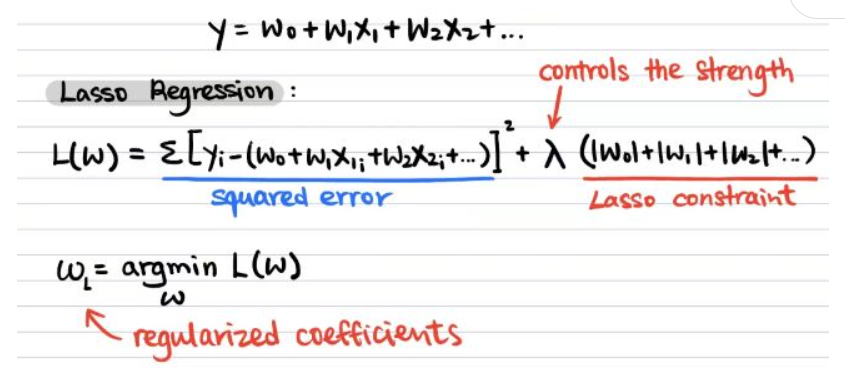

In Lasso regularization, some of the coefficients will be suppressed to zero. Therefore, it can also be used as a feature selection method.

Since Lasso regularization removes unimportant features, it produces simpler and more interpretable linear regression models.

#### L2: Ridge Regularization
In Ridge Regularization, the sum of squared coefficeints is minimized:

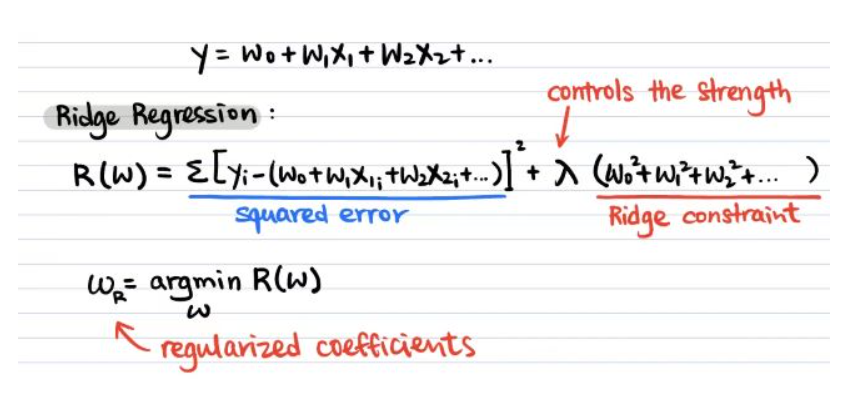

Since Ridge regularization squares the coefficients, larger coefficients will be suppressed more and those that are close to zero will be barely affected. Therefore, Ridge regularization will not remove features from a linear model but will instead pruduce many small coefficients close to zero.

Ridge regularization is more preferable when all the features contribute a little in predicting the output while Lasso regulariztion is better when some features stand out with more significant impact on the target variable.

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.model_selection import KFold, cross_val_score, train_test_split

### Import Data
This is the data from House Price Prediction but it has already been preprocessed (log-transform, fill missing values, encode categorical variables, drop features) and is ready to be used for modelling.

In [2]:
X_train = pd.read_csv("E:\Courses\Data science(ETLHive)\dataset\cleaned_train_X.csv")
y_train = pd.read_csv("E:\Courses\Data science(ETLHive)\dataset\cleaned_train_y.csv")

In [3]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.067331,-0.209359,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.529034,0.581145,-0.293025,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-0.873616,0.481900,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.567016,1.178255,-0.293025,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.067331,-0.071107,0.137197,0.646183,-0.507284,0.980221,0.848965,0.338903,0.098189,-0.293025,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.302568,-0.439779,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.567016,-0.494529,-0.293025,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.067331,0.666236,0.518903,1.355551,-0.507284,0.947203,0.753229,1.390216,0.469187,-0.293025,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.067331,-0.347611,-0.285470,-0.063185,-0.507284,0.914184,0.753229,-0.567016,-0.968705,-0.293025,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,-0.873616,0.712320,0.381311,-0.063185,0.391237,0.220801,0.178812,0.098443,0.765547,0.670616,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,0.302568,-0.163275,-0.142806,0.646183,3.086800,-1.000876,1.040437,-0.567016,-0.365009,-0.293025,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,-0.873616,-0.071107,-0.057207,-0.772552,0.391237,-0.703711,0.561757,-0.567016,-0.861137,5.790328,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [4]:
y_train

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
...,...
1455,12.072547
1456,12.254868
1457,12.493133
1458,11.864469


#### Evaluation Metric
This is a regression problem and therefure we use root-mean-square-error as our evaluation metric.

In [5]:
def rmsle_cv(model):
    kf = KFold(5, shuffle=True, random_state=0).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv=5))
    return rmse

### Linear Regression
Linear regression uses all the features provided and is clearly suffering from overfitting.

In [6]:
#Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = rmsle_cv(lr)
print(f"Linear Regression score: {round(lr_score.mean(),3)}")

Linear Regression score: 1893033534985.454


# Lasso Regression
The lasso regression model in scikit-learn has a hyperparameter called alpha. This is equivalent to the lambda in the loss function demonstarted above which controls the strength of regularization.

Here is what we will do:

* Train a lasso regression model with the default alpha value (1.0)
* Tune the alpha value with cross-validation
* Train a lasso regression model with the best alpha value

Here we use the RobustScaler() in combination with our lasso regression to make the model more robust to outliers.

In [7]:
#Lasso regression model with default alpha value
lasso = make_pipeline(RobustScaler(), Lasso(max_iter=5000, random_state=0))
lasso.fit(X_train, y_train)
lasso_score = rmsle_cv(lasso)
print(f"Lasso Regression score: {round(lasso_score.mean(),3)}")

Lasso Regression score: 0.386


In [8]:
#tune the alpha value with cross-validation
alpha_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
for alpha in alpha_values:
    lasso = make_pipeline(RobustScaler(), Lasso(alpha=alpha, max_iter=5000, random_state=0))
    lasso.fit(X_train, y_train)
    lasso_score = rmsle_cv(lasso)
    print(f"Lasso Regression score: {round(lasso_score.mean(),3)}")

Lasso Regression score: 0.151
Lasso Regression score: 0.147
Lasso Regression score: 0.145
Lasso Regression score: 0.142
Lasso Regression score: 0.146
Lasso Regression score: 0.193
Lasso Regression score: 0.247
Lasso Regression score: 0.377
Lasso Regression score: 0.386
Lasso Regression score: 0.399
Lasso Regression score: 0.399


In [9]:
#use the best alpha value
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.005, max_iter=5000, random_state=0))
lasso.fit(X_train, y_train)
lasso_score = rmsle_cv(lasso)
print(f"Lasso Regression score: {round(lasso_score.mean(),3)}")

Lasso Regression score: 0.142


### Ridge Regression

In [10]:
#Ridge regression model with default alpha value
ridge = make_pipeline(RobustScaler(), Ridge(max_iter=5000, random_state=0))
ridge.fit(X_train, y_train)
ridge_score = rmsle_cv(ridge)
print(f"Ridge Regression score: {round(ridge_score.mean(),3)}")

Ridge Regression score: 0.153


In [11]:
#tune the alpha value with cross-validation
alpha_values = [0.1, 0.5, 1, 5, 10, 15, 20, 50, 100, 200, 500, 1000]
for alpha in alpha_values:
    ridge = make_pipeline(RobustScaler(), Ridge(alpha=alpha, max_iter=5000, random_state=0))
    ridge.fit(X_train, y_train)
    ridge_score = rmsle_cv(ridge)
    print(f"ridge Regression score: {round(ridge_score.mean(),3)}")

ridge Regression score: 0.153
ridge Regression score: 0.153
ridge Regression score: 0.153
ridge Regression score: 0.152
ridge Regression score: 0.15
ridge Regression score: 0.149
ridge Regression score: 0.149
ridge Regression score: 0.146
ridge Regression score: 0.143
ridge Regression score: 0.14
ridge Regression score: 0.14
ridge Regression score: 0.146


In [12]:
#use the best alpha value
ridge = make_pipeline(RobustScaler(), Ridge(alpha=200, max_iter=5000, random_state=0))
ridge.fit(X_train, y_train)
ridge_score = rmsle_cv(ridge)
print(f"Ridge Regression score: {round(ridge_score.mean(),3)}")

Ridge Regression score: 0.14


#  Refrences


https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

https://medium.com/analytics-vidhya/l1-vs-l2-regularization-which-is-better-d01068e6658c